# Elementary Propagation
S Singleton based an assignment by J Mills, R Estler

## Information
- *An Introduction to Error Analysis*, Taylor, University Science Books, 1997, Ch 3.
- Wikipedia [Propagation of Uncertainty](https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Simplification)
- NIST's Engineering Statistics Handbook [Propagation of error considerations](http://itl.nist.gov/div898/handbook/mpc/section5/mpc55.htm)
- "Error propagation: A functional approach," I.F. Hughes, T.P.A. Hase, *J. Chem. Ed.*, 89, 2012, p821,  [DOI: 10.1021/ed2004627](http://pubs.acs.org/doi/abs/10.1021/ed2004627)
- *A Student's Guide to Data and Error Analysis*, Berendsen, Cambridge U. Press, 2011, Ch 3.


## Learning Outcomes
- Use the general formula for propagation of error
- Use `sympy` to derive symbolic expressions useful in the propagation of error

# Task
Apply the general uncertainty propagation equation to the measurement situation listed
below to develop specific explicit uncertainty expressions.

For example
<center>Absorbance = absorptivity $\times$ path length $\times$ molarity</center>

$$A = a \times b \times M$$

The uncertainty in $A$ is $\delta A$, and so on.


$$
  \delta A = \sqrt{\left( \frac{\partial A}{\partial a}\right) ^2
    _{bM} \delta a^2 + \left(\frac{\partial A}{\partial b}
    \right)^2_{aM} \delta b^2 + \left(\frac{\partial A}{\partial
        M}\right)^2_{ab} \delta
    M^2 }
$$ 

Take the derivative of $A$ with respect to each variable and simplify:

$$
  = \sqrt{(b^2 M^2 \delta a^2 + a^2 M^2 \delta b^2 + a^2 b^2 \delta
  M^2)} $$

## How it can be done

This is a symbolic manipulation, so we use `sympy`. It's safe to '`import *`' because we won't be doing `numpy`-related work in this notebook.  The uncertainty terms (e.g, $\delta a$) could be included, but I chose not to. In this case, I would "manually" include these terms in a written solution (sometimes the computer isn't the best tool for everything?).

In [1]:
# uncomment next line if running python2
#from __future__ import print_function, division
from sympy import *
init_printing()

In [2]:
# declare sympy variables
var('a b M')

# assign A an expression
A = a * b * M

Next, calculate the partial derivatives with respect to each variable, e.g., $\partial A / \partial a$. I will show three ways to accomplish the task. There is usually a trade-off between readability and coding efficiency. Choose the former when in doubt.

### Approach 1: compute each term individually

In [3]:
dA_da = diff(A, a)
dA_db = diff(A, b)
dA_dM = diff(A, M)

dA_da, dA_db, dA_dM

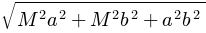

In [4]:
# square, sum, and square root these terms (sum in quadrature)
deltaA = sqrt(dA_da**2 + dA_db**2 + dA_dM**2)
deltaA

### Approach 2: use a `for` loop and accumulation variable

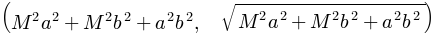

In [5]:
cumsum = 0  # a variable for the cumulative sum

for v in ['a', 'b', 'M']:
    cumsum = cumsum + diff(A, v)**2

cumsum, sqrt(cumsum)

### Approach 3: list comprehension
(the melt-your-brain approach)

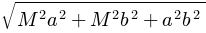

In [6]:
sqrt(sum(diff(A,v)**2 for v in['a', 'b', 'M']))  

## Your Turn
Derive uncertainty relationships for the following expressions. Constants are noted; all other labels are variables.

### Root-mean-square speed of a gas-phase molecule
$$ 
 v_{\text{rms}} = \sqrt{\frac{3 RT}{M}}   \qquad  R \text{ constant}
 $$

### van der Waals [equation of state](https://en.wikipedia.org/wiki/Van_der_Waals_equation) for real gases
 
$$P = \frac{RT}{V-b} - \frac{a}{V^2} \qquad  R \text{ constant}$$

### Compressibility of an ideal gas
$$Z = \frac{PV}{RT} \qquad  R \text{ constant}$$

### Rotational partition function
 
$$q_r  = \frac{2IkT}{\sigma h^2} \qquad k,\: \sigma,\: h
  \text{ constant}$$

### Translational partition function
 
$$ q_{tr} = \left( \frac{2 \pi mkT}{h^2}\right) ^{3/2} \qquad
  k, h \text{ constant}
$$